No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


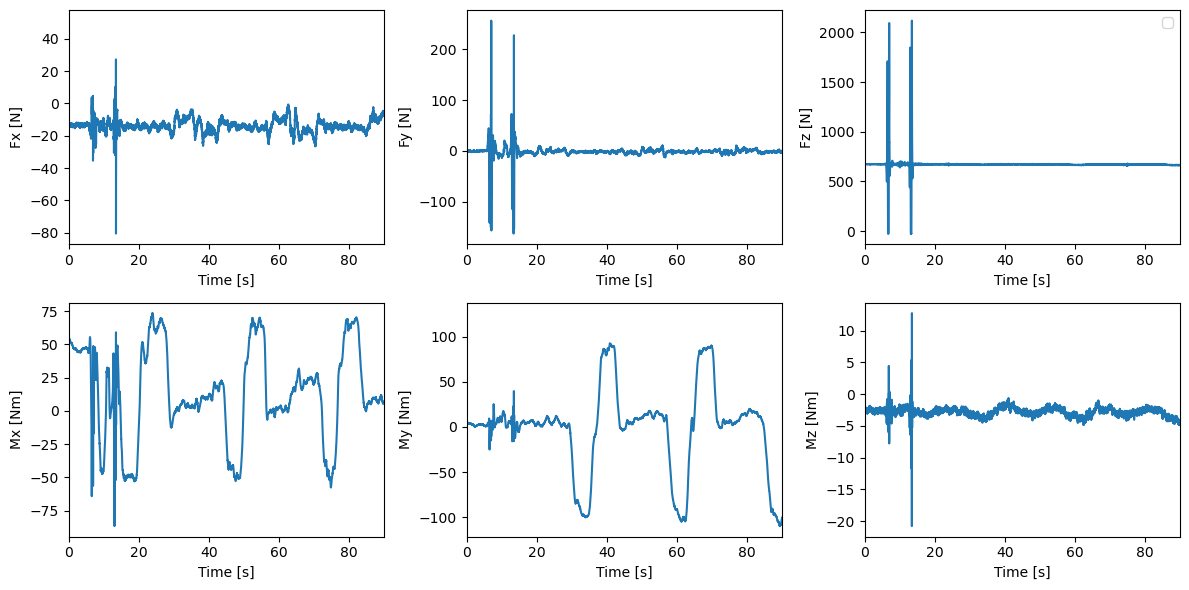

In [3]:
"""Plot recorded ground reaction force (GRF)
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def main():
    # Setup variables
    t0 =  0.0                              # time of the beginning of the plot [s] (this time is included)
    t1 = 90.0                              # time of the end of the plot [s] (this time is NOT included!)
    filename = "forceplate2.csv"            # filename of GRF data
    figname = "../results/Ground_reaction_force2.png"  # filename of the output figure

    # Load data of the ground reaction force.
    df = pd.read_csv(filename, header=31, usecols=[1, 3, 4, 5, 6, 7, 8])

    # Extract time and GRF data separately
    times = df.values[:, 0]   # time [s]
    data = df.values[:, 1:]  # GRF values [N, Nm]

    # Compute plot range in x-axis (i.e., time-axis)
    r0 = np.where(times >= t0)[0][0]   # start index
    r1 = np.where(times <= t1)[0][-1]  # final index (not included)

    # Plot the data
    ylabels = ["Fx [N]", "Fy [N]", "Fz [N]", "Mx [Nm]", "My [Nm]", "Mz [Nm]"]
    fig = plt.figure(figsize=(12, 6))
    for i in range(6):
        ax = fig.add_subplot(2, 3, i+1)
        ax.plot(times, data[:, i])
        ax.set_xlabel("Time [s]")
        ax.set_ylabel(ylabels[i])
        ax.set_xlim((times[r0], times[r1]))
        if i == 2:
            ax.legend()
    fig.tight_layout()

    # Save the figure
    plt.savefig(figname)

    # Show the figure
    plt.show()


if __name__ == "__main__":
    main()
